# Explore here

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# VER BASE DE DATOS:

df_costo_seguro = pd.read_csv('../data/raw/medical_insurance_cost.csv')
print(df_costo_seguro.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [31]:
# VER INFO DE LA BASE DE DATOS:

print(f"Información General: {df_costo_seguro.info()}")

print(f"Estadísticas: {df_costo_seguro.describe()}")

print(f"Comprobar valores nulos: {df_costo_seguro.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Información General: None
Estadísticas:                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.69

/tmp/ipykernel_4125/3390470256.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axis[1, 0], data=df_costo_seguro, x='smoker', y='charges', palette='dark')
/tmp/ipykernel_4125/3390470256.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axis[1, 1], data=df_costo_seguro, x='sex', y='charges', palette='dark')


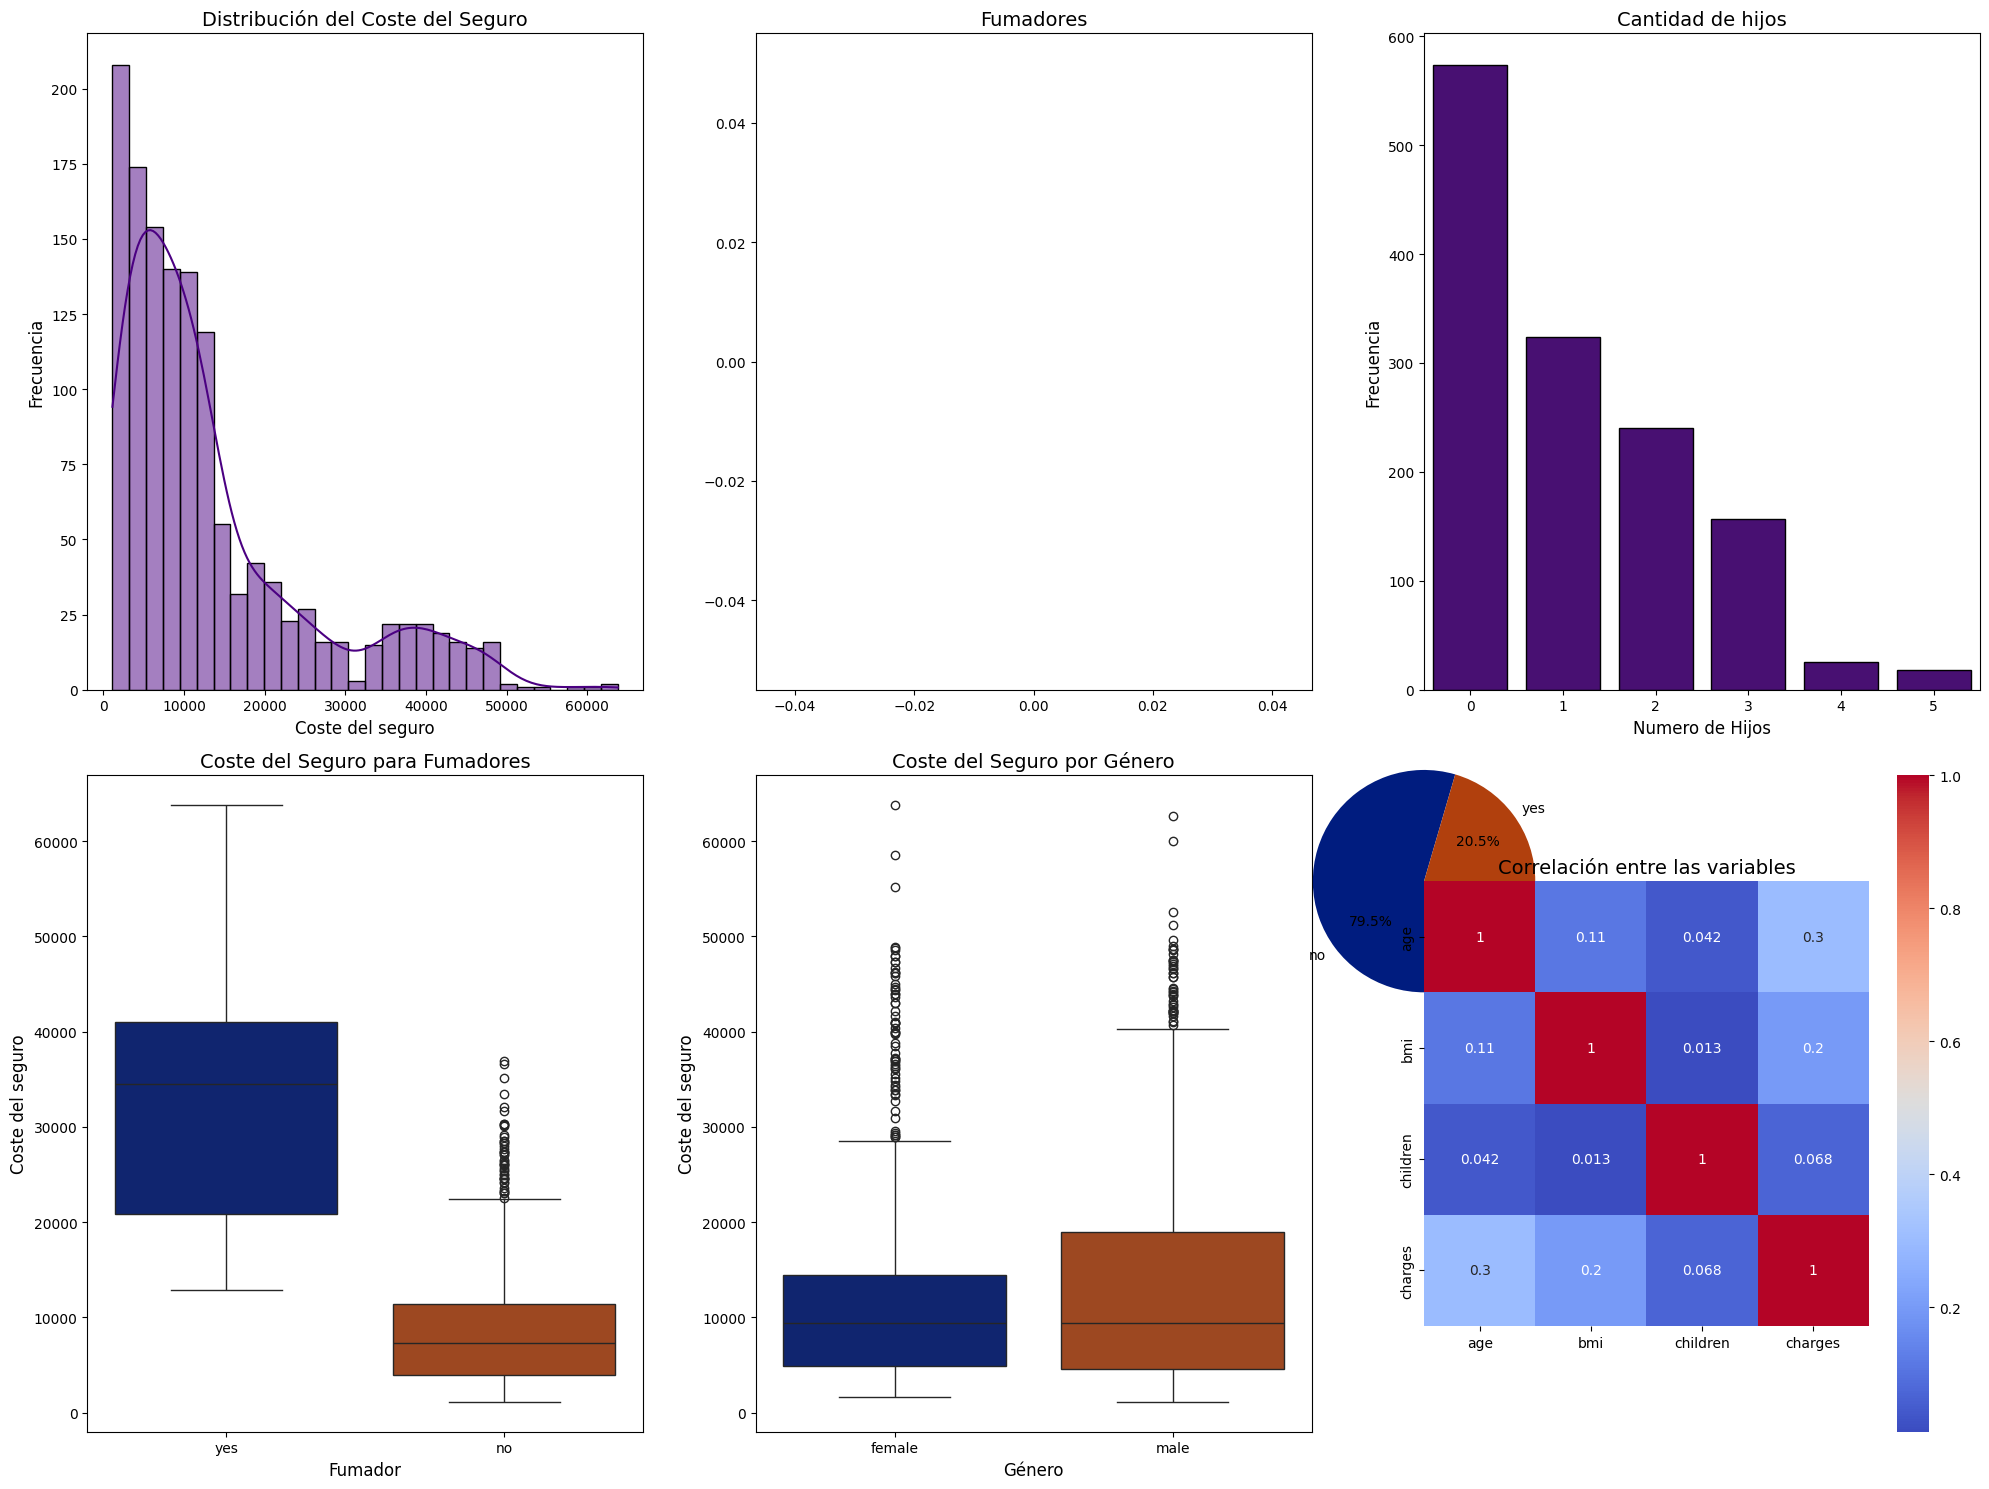

In [32]:
# PRIMER VISTAZO GRÁFICO:

fig, axis = plt.subplots(2, 3, figsize = (20, 15))

# Historiograma de los costes del seguro:

sns.histplot(ax=axis[0, 0], data=df_costo_seguro, x='charges', kde=True, color='indigo', edgecolor='black')
axis[0, 0].set_title("Distribución del Coste del Seguro", fontsize=14)
axis[0, 0].set_xlabel("Coste del seguro", fontsize=12)
axis[0, 0].set_ylabel("Frecuencia", fontsize=12)

# Gráfico pastel de distribución de fumadores:

fumadores = df_costo_seguro['smoker'].value_counts()
plt.pie(fumadores,
        labels=fumadores.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('dark'))
axis[0, 1].set_title("Fumadores", fontsize=14)
axis[0, 1].axis('equal')

# Gráfico de barras con número de hijos:

sns.countplot(ax=axis[0, 2], data=df_costo_seguro, x='children', color='indigo', edgecolor='black')
axis[0, 2].set_title("Cantidad de hijos", fontsize=14)
axis[0, 2].set_xlabel("Numero de Hijos", fontsize=12)
axis[0, 2].set_ylabel("Frecuencia", fontsize=12)

# Boxplot coste por fumador:

sns.boxplot(ax=axis[1, 0], data=df_costo_seguro, x='smoker', y='charges', palette='dark')
axis[1, 0].set_title("Coste del Seguro para Fumadores", fontsize=14)
axis[1, 0].set_xlabel("Fumador", fontsize=12)
axis[1, 0].set_ylabel("Coste del seguro", fontsize=12)

# Boxplot coste por género:

sns.boxplot(ax=axis[1, 1], data=df_costo_seguro, x='sex', y='charges', palette='dark')
axis[1, 1].set_title("Coste del Seguro por Género", fontsize=14)
axis[1, 1].set_xlabel("Género", fontsize=12)
axis[1, 1].set_ylabel("Coste del seguro", fontsize=12)

# Heatmap de correlación:

correlacion = df_costo_seguro.corr(numeric_only=True)
sns.heatmap(ax=axis[1, 2], data=correlacion, annot=True, cmap='coolwarm')
axis[1, 2].set_title("Correlación entre las variables", fontsize=14)

plt.tight_layout()
plt.show()

In [33]:
# PREPARACIÓN DE DATOS:

df_seguro = pd.get_dummies(df_costo_seguro, drop_first=True) 
print(df_seguro)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400     False        True   
1      18  33.770         1   1725.55230      True       False   
2      28  33.000         3   4449.46200      True       False   
3      33  22.705         0  21984.47061      True       False   
4      32  28.880         0   3866.85520      True       False   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830      True       False   
1334   18  31.920         0   2205.98080     False       False   
1335   18  36.850         0   1629.83350     False       False   
1336   21  25.800         0   2007.94500     False       False   
1337   61  29.070         0  29141.36030     False        True   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False  

In [34]:
# CREAR MODELO DE REGRESIÓN LINEAL:

X = df_seguro.drop('charges', axis=1)
y = df_seguro['charges']

# División entre entrenamiento y test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar modelo:

model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones:

y_pred = model.predict(X_test)

# Evaluar modelo:

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

31827950.229523838
0.7999876970680433
